In [ ]:
# Used for building a dataframe
import pandas as pd
# Used for visualization
import matplotlib.pyplot as plt
# Used for data simplification
import seaborn as sns

In [15]:
# Load the dataset with my file path
file_path = '/content/atm_transactions.csv'
data = pd.read_csv(file_path)
print(data)

             atmId                  atmName atmCity  \
0        atm350000          ALİAĞA BAĞLI ŞB   Izmir   
1        atm350001  ALİAĞA İSTİKLAL CADDESİ   Izmir   
2        atm350002         ALİAĞA PAZARYERİ   Izmir   
3        atm350003       ALİAĞA SAHİL PARKI   Izmir   
4        atm350004            ALİAĞA ŞUBE-1   Izmir   
...            ...                      ...     ...   
30151  atm35000354           TORBALI ŞUBE-2   Izmir   
30152  atm35000355              URLA İSKELE   Izmir   
30153  atm35000356      URLA MEYDAN AVM ÖNÜ   Izmir   
30154  atm35000357              URLA ŞUBE-1   Izmir   
30155  atm35000358              URLA ŞUBE-2   Izmir   

                                              atmAddress  totalBalance  \
0                                Aliağa Petkim Tesisleri         40000   
1                             ATATÜRK İSTİKLAL CD. NO:97         40000   
2                             ALİAĞA KAPALI PAZAR GİRİŞİ         40000   
3                       ALİAĞA HİKMET CD.SA

In [17]:
# Convert 'transactionTime' to datetime format
data['transactionTime'] = pd.to_datetime(data['transactionTime'])

In [22]:
# Extract day, week, month, and hour from 'transactionTime'
data['transactionDate'] = data['transactionTime'].dt.date
data['transactionWeek'] = data['transactionTime'].dt.isocalendar().week
data['transactionMonth'] = data['transactionTime'].dt.month
data['transactionDay'] = data['transactionTime'].dt.day
data['transactionHour'] = data['transactionTime'].dt.hour
data['dayOfWeek'] = data['transactionTime'].dt.day_name()

In [14]:
# Set the style for the plots
sns.set(style='whitegrid')

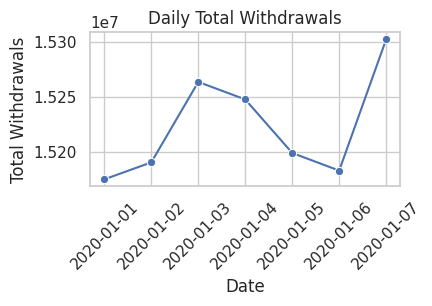

In [13]:
# 1. Daily Total Withdrawals
daily_withdrawals = data.groupby('transactionDate')['totalOutcome'].sum().reset_index()
plt.figure(figsize=(4, 2))
sns.lineplot(x='transactionDate', y='totalOutcome', data=daily_withdrawals, marker='o')
plt.title('Daily Total Withdrawals')
plt.xlabel('Date')
plt.ylabel('Total Withdrawals')
plt.xticks(rotation=45)
plt.show()

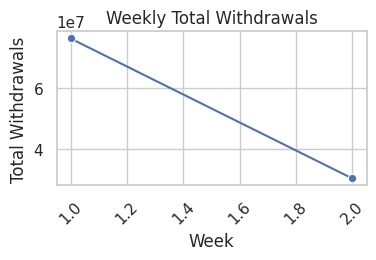

In [12]:
# 2. Weekly Total Withdrawals
weekly_withdrawals = data.groupby('transactionWeek')['totalOutcome'].sum().reset_index()
plt.figure(figsize=(4, 2))
sns.lineplot(x='transactionWeek', y='totalOutcome', data=weekly_withdrawals, marker='o')
plt.title('Weekly Total Withdrawals')
plt.xlabel('Week')
plt.ylabel('Total Withdrawals')
plt.xticks(rotation=45)
plt.show()

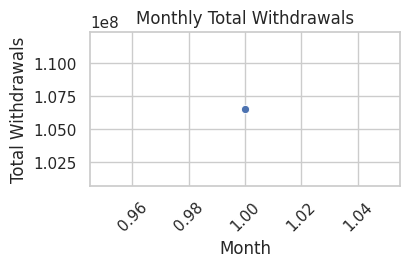

In [11]:
# 3. Monthly Total Withdrawals
monthly_withdrawals = data.groupby('transactionMonth')['totalOutcome'].sum().reset_index()
plt.figure(figsize=(4, 2))
sns.lineplot(x='transactionMonth', y='totalOutcome', data=monthly_withdrawals, marker='o')
plt.title('Monthly Total Withdrawals')
plt.xlabel('Month')
plt.ylabel('Total Withdrawals')
plt.xticks(rotation=45)
plt.show()

In [9]:
# 4. Highest Single Withdrawal Amount
highest_withdrawal = data['totalOutcome'].max()
print(f'Highest Single Withdrawal Amount: {highest_withdrawal}')

Highest Single Withdrawal Amount: 9710


In [8]:
# 5. Average Daily Withdrawal Amount
average_daily_withdrawal = daily_withdrawals['totalOutcome'].mean()
print(f'Average Daily Withdrawal Amount: {average_daily_withdrawal}')

Average Daily Withdrawal Amount: 15222990.0


In [7]:
# 6. Average Weekly Withdrawal Amount
average_weekly_withdrawal = weekly_withdrawals['totalOutcome'].mean()
print(f'Average Weekly Withdrawal Amount: {average_weekly_withdrawal}')

Average Weekly Withdrawal Amount: 53280465.0


In [6]:
# 7. Average Monthly Withdrawal Amount
average_monthly_withdrawal = monthly_withdrawals['totalOutcome'].mean()
print(f'Average Monthly Withdrawal Amount: {average_monthly_withdrawal}')

Average Monthly Withdrawal Amount: 106560930.0


In [5]:
# 8. ATM with the Highest Number of Transactions
atm_highest_transactions = data.groupby('atmId')['totalNumberTransaction'].sum().idxmax()
print(f'ATM with the Highest Number of Transactions: {atm_highest_transactions}')

ATM with the Highest Number of Transactions: atm3500087


In [3]:
# 9. ATM with the Highest Total Withdrawal Amount
atm_highest_withdrawals = data.groupby('atmId')['totalOutcome'].sum().idxmax()
print(f'ATM with the Highest Total Withdrawal Amount: {atm_highest_withdrawals}')

ATM with the Highest Total Withdrawal Amount: atm35000272


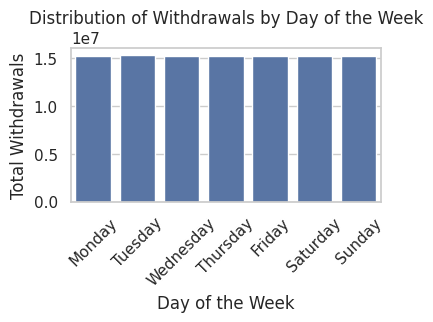

In [19]:
# 10. Distribution of Withdrawals by Day of the Week
withdrawals_by_day = data.groupby('day')['totalOutcome'].sum().reset_index()
plt.figure(figsize=(4, 2))
sns.barplot(x='day', y='totalOutcome', data=withdrawals_by_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Withdrawals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Withdrawals')
plt.xticks(rotation=45)
plt.show()

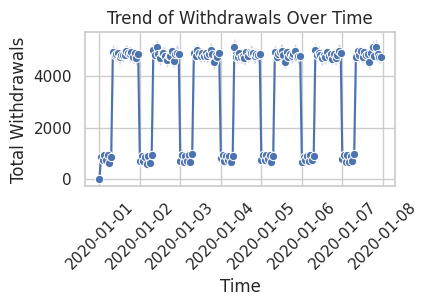

In [20]:
# 11. Trend of Withdrawals Over Time
plt.figure(figsize=(4, 2))
sns.lineplot(x='transactionTime', y='totalOutcome', data=data, marker='o')
plt.title('Trend of Withdrawals Over Time')
plt.xlabel('Time')
plt.ylabel('Total Withdrawals')
plt.xticks(rotation=45)
plt.show()

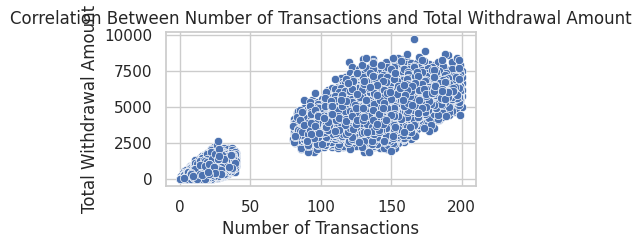

In [21]:
# 12. Correlation Between Number of Transactions and Total Withdrawal Amount
plt.figure(figsize=(4, 2))
sns.scatterplot(x='totalNumberTransaction', y='totalOutcome', data=data)
plt.title('Correlation Between Number of Transactions and Total Withdrawal Amount')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Withdrawal Amount')
plt.show()

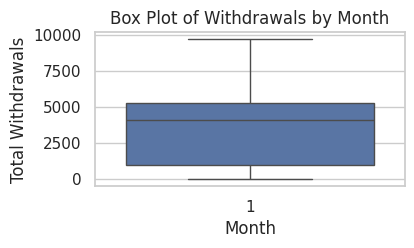

In [24]:
# 13. Box Plot of Withdrawals by Month
plt.figure(figsize=(4, 2))
sns.boxplot(x='transactionMonth', y='totalOutcome', data=data)
plt.title('Box Plot of Withdrawals by Month')
plt.xlabel('Month')
plt.ylabel('Total Withdrawals')
plt.show()

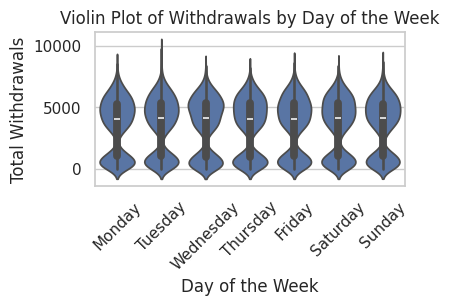

In [25]:
# 14. Violin Plot of Withdrawals by Day of the Week
plt.figure(figsize=(4, 2))
sns.violinplot(x='dayOfWeek', y='totalOutcome', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Violin Plot of Withdrawals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Withdrawals')
plt.xticks(rotation=45)
plt.show()

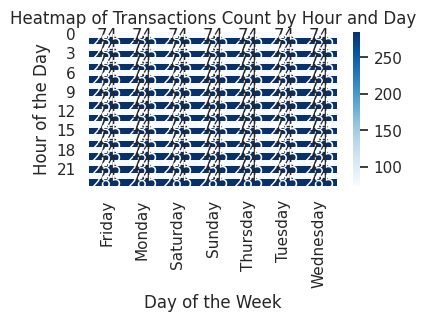

In [26]:
# 15. Heatmap of Transactions Count by Hour and Day
hour_day_pivot = data.pivot_table(index=data['transactionTime'].dt.hour, columns=data['transactionTime'].dt.day_name(), values='totalNumberTransaction', aggfunc='count')
plt.figure(figsize=(4, 2))
sns.heatmap(hour_day_pivot, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Transactions Count by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

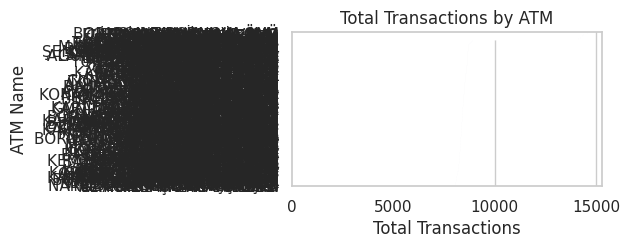

In [27]:
# 16. Bar Plot of Total Transactions by ATM
atm_transactions = data.groupby('atmName')['totalNumberTransaction'].sum().reset_index().sort_values(by='totalNumberTransaction', ascending=False)
plt.figure(figsize=(4, 2))
sns.barplot(x='totalNumberTransaction', y='atmName', data=atm_transactions)
plt.title('Total Transactions by ATM')
plt.xlabel('Total Transactions')
plt.ylabel('ATM Name')
plt.show()

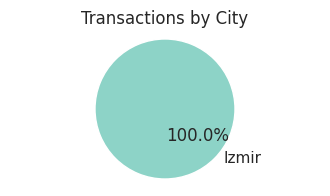

In [28]:
# 17. Pie Chart of Transactions by City
city_transactions = data.groupby('atmCity')['totalNumberTransaction'].sum().reset_index()
plt.figure(figsize=(4, 2))
plt.pie(city_transactions['totalNumberTransaction'], labels=city_transactions['atmCity'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(city_transactions)))
plt.title('Transactions by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()